In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
%matplotlib inline 

# Carregando dados

In [24]:
arquivos = glob('./dados/2020/*.csv')

In [25]:
arquivos

['./dados/2020\\aracaju_2020.csv',
 './dados/2020\\fortaleza_2020.csv',
 './dados/2020\\joao_pessoa_2020.csv',
 './dados/2020\\maceio_2020.csv',
 './dados/2020\\natal_2020.csv',
 './dados/2020\\recife_2020.csv',
 './dados/2020\\salvador_2020.csv',
 './dados/2020\\sao_luis_2020.csv',
 './dados/2020\\teresina_2020.csv']

In [50]:
capitais = pd.concat(pd.read_csv(cont, sep= ';') for cont in arquivos)

In [51]:
capitais

,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,13,13,13,0,0,0.0,0.0
1,14,123,10,6,2,0.0,0.0
2,15,212,10,27,2,0.0,0.0
3,16,272,19,28,0,0.0,0.0
4,17,517,46,33,2,0.0,0.0
...,...,...,...,...,...,...,...
36,49,304546,2074,8171,13,0.0,0.0
37,50,316674,1524,8267,13,0.0,0.0
38,51,325989,1310,8332,7,0.0,0.0
39,52,335052,1190,8398,11,0.0,0.0


# Distribuição total de casos 2020

In [179]:
labels = ['Aracaju', 'Fortaleza', 'João Pessoa', 'Maceió', 'Natal', 'Recife', 'Salvador', 'São Luís', 'Teresina']

In [180]:
casos_totais = capitais.loc[capitais['semanaEpi'] == 52]
casos_totais.insert(7, 'PopulacaoTotal', [657013, 2669342, 809015, 1018948, 884122, 1645727, 2872347, 1101884, 864845])
casos_totais.insert(0, 'Cidade', labels, True)


In [213]:
casos_totais.reset_index()


,index,Cidade,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,PopulacaoTotal
0,39,Aracaju,52,360984,3051,6151,12,0.0,0.0,657013
1,39,Fortaleza,52,546920,1533,28989,15,0.0,0.0,2669342
2,39,João Pessoa,52,231498,1349,8212,27,0.0,0.0,809015
3,39,Maceió,52,243366,1131,7430,23,0.0,0.0,1018948
4,39,Natal,52,231498,1349,8212,27,0.0,0.0,884122
5,39,Recife,52,331498,2165,18592,40,0.0,0.0,1645727
6,39,Salvador,52,749099,2242,21988,31,0.0,0.0,2872347
7,39,São Luís,52,183780,222,9060,5,0.0,0.0,1101884
8,39,Teresina,52,335052,1190,8398,11,0.0,0.0,864845


# Contaminados 2020

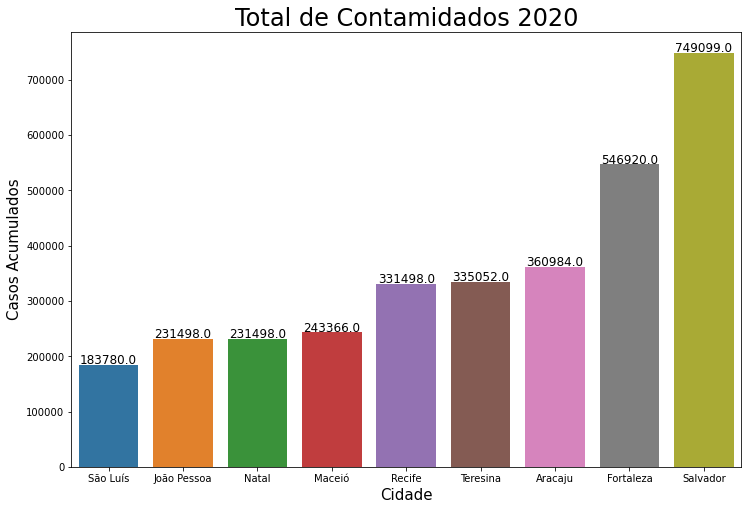

In [111]:
contaminados = casos_totais.sort_values('casosAcumulado')
fig, ax = plt.subplots(figsize = (12, 8))
plot = sns.barplot(x= 'Cidade', y= 'casosAcumulado', data= contaminados)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()), ha = 'center', 
                  va= 'baseline', fontsize= 12, color= 'black', xytext=(0, 1),
                 textcoords= 'offset points')

ax.set_xlabel( "Cidade" , size = 15 ) 
ax.set_ylabel( "Casos Acumulados" , size = 15 ) 
ax.set_title( "Total de Contamidados 2020" , size = 24 ) 
plt.show() 

# Óbitos 2020

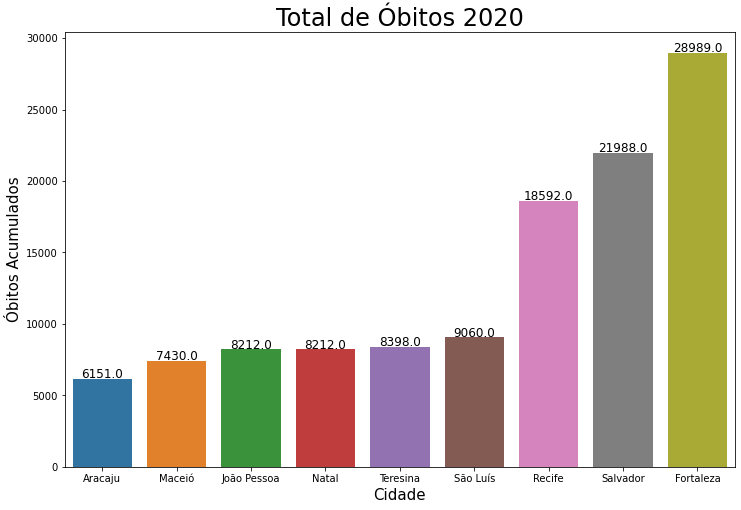

In [155]:
obitos_totais = casos_totais.sort_values('obitosAcumulado')
fig, ax = plt.subplots(figsize = (12, 8))
plot = sns.barplot(x= 'Cidade', y= 'obitosAcumulado', data= obitos_totais)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()), ha = 'center', 
                  va= 'baseline', fontsize= 12, color= 'black', xytext=(0, 1),
                 textcoords= 'offset points')

    ax.set_xlabel( "Cidade" , size = 15 ) 
ax.set_ylabel( "Óbitos Acumulados" , size = 15 ) 
ax.set_title( "Total de Óbitos 2020" , size = 24 ) 
plt.show() 

# Taxa de mortalidade por 100.000 habitantes

In [208]:
mortalidade = casos_totais[['Cidade', 'PopulacaoTotal', 'obitosAcumulado']]

In [209]:
casos = round(mortalidade.obitosAcumulado * 1000 / mortalidade.PopulacaoTotal, 2)

In [210]:
mortalidade['Mortalidade %'] = casos

C:\Users\welli\AppData\Local\Temp/ipykernel_14808/2896941480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortalidade['Mortalidade %'] = casos


In [215]:
mortalidade

,Cidade,PopulacaoTotal,obitosAcumulado,Mortalidade %
39,Aracaju,657013,6151,9.36
39,Fortaleza,2669342,28989,10.86
39,João Pessoa,809015,8212,10.15
39,Maceió,1018948,7430,7.29
39,Natal,884122,8212,9.29
39,Recife,1645727,18592,11.30
39,Salvador,2872347,21988,7.66
39,São Luís,1101884,9060,8.22
39,Teresina,864845,8398,9.71


# Coeficiente de incidência